# **Trabalho 3 de Inteligência Artificial 1**

Professora: Li Weigang

Aluna: Daniele Dias

matrícula: 20/0081691

---

## Criando o Perceptron

>> O *Perceptron* abaixo, com a função degrau de ativação, inicia com valores randômicos entre $-1$ e $1$, modelado com a função linear do tipo $y = ax + b$, onde $a$ é definido como os pesos (*weights*) e $b$ o viés (*bias*), e a atualização destes pesos e vieses é feita pela variável *update*, que relaciona a taxa de aprendizado do neurônio (*alpha*) com o erro entre a saída desejada e a saída calculada a cada iteração (*epoch*).

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class Perceptron(object):
  
  def __init__(self, alpha=0.1, epochs=10):
    np.random.seed(1) # [OBS1]
    self.alpha = alpha # alpha é o nosso fator de correção
    self.epochs = epochs
    self.weights = None
    self.bias = None
  
  def fit (self, X, Y):
    n_samples, n_features = X.shape
    # Inicialize os Pesos e Bias: [ATIVIDADE 1]
    random_values = 2*np.random.random((n_features + 1,)) - 1
    #random_values = np.zeros(1 + n_features)
    self.weights = random_values[1:]
    self.bias = random_values[0]

    for epoch in range(self.epochs):
      for index, x_i in zip(X, Y):
        # Defina as funções de treinamento: [ATIVIDADE 2]
        update = self.alpha * (x_i - self.predict(index))
        self.weights += update * index
        self.bias += update
    return self
 
  def predict(self, X):
    # Calcule o output do perceptron: [ATIVIDADE 3]
    sum = np.dot(X, self.weights) + self.bias
    output = self.activation(sum)
    return output

  def activation(self, signal):
    return np.where( signal >= 0, 1, 0) # Função degrau de ativação


>> Esta função **accuracy** determina, com valores entre $0$ e $1$, qual o percentual de acerto entre a base de teste e o valores previsto pelo *Perceptron* feita na classe acima.

In [3]:
def accuracy(y_true, y_pred):
    hits = 0
    # Crie uma função de acurácia simples: [ATIVIDADE 4]
    result = sum(y_true == y_pred) / len(y_true)
    return result

## Validando o perceptron criado
Aqui vamos conferir se o perceptron foi criado corretamente solucionando um problema simples de classificação linear utilizando sklearn.

Perceptron classification accuracy 1.0


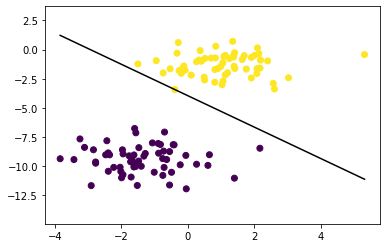

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

p = Perceptron(alpha=0.01, epochs=10)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

# Visualizando o problema que foi solucionado

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

## OCR: Reconhecimento Óptico de Caracteres
Vamos resolver um problema de OCR simples que pode ser caracterizado como um problema de classificação, que recebe a imagem de um caracter como input e retorna a label correspondente.

## Dataset
Faremos uso do dataset MNIST: http://yann.lecun.com/exdb/mnist/

![picture](https://drive.google.com/uc?id=1qfouepB0Dd5BmGofIS7Nafa-nE7m9TIs)

Esse dataset é composto "imagens" de números de 0 à 9, e contém 60.000 exemplos de treinamento e 10.000 exemplos de teste.

A palavra "imagens" foi posta entre aspas porque os arquivos não estão salvos em .png ou .jpg, eles já estão num arquivo binário descrito no link do dataset que contém as informações pixel a pixel dos exemplos.

Como o foco desse trabalho não é a manipulação de arquivos com python, deixei disponível aqui embaixo algumas funções que já tratarão desses dados e disponibilizarão de maneira simples para vocês usarem.

In [5]:
# download do dataset (training set images)
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
# download do dataset (training set labels)
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
# download do dataset (testing set images)
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
# download do dataset (testing set labels)
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  91.7M      0 --:--:-- --:--:-- --:--:-- 91.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0   972k      0 --:--:-- --:--:-- --:--:--  972k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0  31.4M      0 --:--:-- --:--:-- --:--:-- 31.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0   116k      0 --:--:-- --:--:-- --:--:--  116k


In [6]:
# Extrair arquivos
!gunzip *

gzip: sample_data is a directory -- ignored


In [7]:
def bytes_to_int(byte_data):
    return int.from_bytes(byte_data, 'big')

def read_images(filename, n_max_images=None, show = False):
    images = []
    with open(filename, 'rb') as f:
        _ = f.read(4)  # magic number
        n_images = bytes_to_int(f.read(4))
        if n_max_images:
            n_images = n_max_images
        n_rows = bytes_to_int(f.read(4))
        n_columns = bytes_to_int(f.read(4))
        for image_idx in range(n_images):
            image = []
            for row_idx in range(n_rows):
                row = []
                for col_idx in range(n_columns):
                    if show:
                        pixel = f.read(1)
                    else:
                        pixel = bytes_to_int(f.read(1))
                    row.append(pixel)
                image.append(row)
            images.append(image)
    return images

def read_labels(filename, n_max_labels=None):
    labels = []
    with open(filename, 'rb') as f:
        _ = f.read(4)  # magic number
        n_labels = bytes_to_int(f.read(4))
        if n_max_labels:
            n_labels = n_max_labels
        for label_idx in range(n_labels):
            label = bytes_to_int(f.read(1))
            labels.append(label)
    return labels

In [8]:
def flatten_list(l):
    return [pixel for sublist in l for pixel in sublist]
    
def extract_features(X):
    return [flatten_list(sample) for sample in X]

A função `extract_features` seria responsável por extrair features das imagens, porém como estamos carregando todos os dados diretamente nos neurônios, ela só irá chamar a função `flatten_list` para todos os samples.

A função `flatten_list` irá transformar o que era uma matriz de dados 28 x 28 em um simples vetor com 784 valores que será carregado como input para nosso perceptron.

## Pré-Processamento

In [9]:
TEST_DATA_FILENAME = 't10k-images-idx3-ubyte'
TEST_LABELS_FILENAME = 't10k-labels-idx1-ubyte'
TRAIN_DATA_FILENAME = 'train-images-idx3-ubyte'
TRAIN_LABELS_FILENAME = 'train-labels-idx1-ubyte'

n_train = 100 # Numero de imagens carregadas para treinamento
n_test = 10 # Numero de imagens carregadas para teste

x_train = read_images(TRAIN_DATA_FILENAME, n_train)
y_train = np.array(read_labels(TRAIN_LABELS_FILENAME, n_train)).reshape(n_train,1)
print(len(x_train[0]))
print(len(x_train[0][0]))

x_test = read_images(TEST_DATA_FILENAME, n_test)
y_test = read_labels(TEST_LABELS_FILENAME, n_test)

x_train = np.array(extract_features(x_train))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
x_test = np.array(extract_features(x_test))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
print(len(x_train[0]))


28
28
784


### Visualização

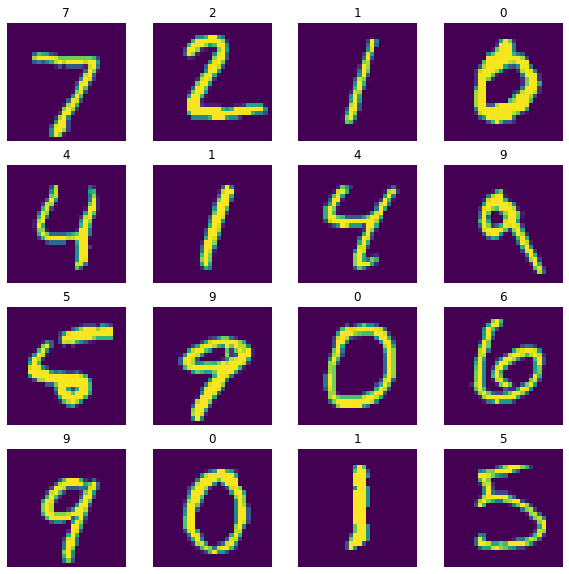

In [10]:
from PIL import Image

sample_images = read_images(TEST_DATA_FILENAME, 16, show=True)
sample_labels = read_labels(TEST_LABELS_FILENAME, 16)
plt.figure(figsize=(10, 10))
for idx, test_sample in enumerate(sample_images):
    img = Image.fromarray(np.array(test_sample), 'L')
    ax = plt.subplot(4, 4, idx + 1)
    plt.imshow(img)
    plt.title(int(sample_labels[idx]))
    plt.axis("off")   

## Modelagem



### Começando com o perceptron classificador de 1s:

>> Utilizando o *Perceptron* feito na **atividade 1**, e sendo este somente 1 neurônio, ele é limitado a respostas do tipo $0$ ou $1$. Primeiramente é feita a adaptação dos dados, onde todos os valores diferentes de $1$ da base de treinamento são zerados e armazenados em **y_formatado**, treinando assim um classificador de 1s e fazendo as previsões utilizando a base de testes.

In [11]:
P = Perceptron(alpha=0.01, epochs=200)
intermediate = y_train
# Formatar labels de treinamento: [ATIVIDADE 5]
y_formatado = np.where(intermediate == 1 , 1, 0)

# Treinar Rede: [ATIVIDADE 6]

training = p.fit(x_train,y_formatado)

# Gerar vetor de predições: [ATIVIDADE 7]

predictions = training.predict(x_test)

print(y_test)
print(predictions)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
[0 0 1 0 0 1 0 0 0 0]


### Agora com os 10 classificadores

>> Utilizando os mesmos parâmetros da **atividade 5**, agora é treinado para cada valor da base de treinamento (entre $0$ e $9$), e armazenado em uma lista de objetos cada treinamento para cada valor, e feito igualmente para as predições. Como mostra o *print*, ele não consegue acertar a posição que tem o valor 2 na base de teste. 

In [12]:
P_list = []
predictions = []
# Inicialize uma lista de 10 perceptrons: [ATIVIDADE 8]

for i in range(10):
  intermediate = y_train
  y_formatado = np.where(intermediate == i , 1, 0)
  # Loop de treinamento: [Atividade 9]
  training = p.fit(x_train,y_formatado)
  # Loop de predições: [Atividade 10]
  prediction = training.predict(x_test)
  P_list.append(training)
  predictions.append(prediction)
  del(y_formatado, intermediate)

print(y_test)
print(predictions[2])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
[1 0 0 0 1 1 0 0 0 0]


### Formatando tudo para calcular acuracia

A variável predictions contém o resultado da predição dos nossos 10 perceptrons, e para cada um deles existe um vetor de n_test predições. 

Para que possamos calcular a acurácia precisamos agrupar a primeira predição de cada perceptron, a segunda de cada perceptron, e assim por diante.

Além disso precisamos converter o nosso vetor de labels para comparar com as predições. Lembrando que aqui teremos o problema de quebrar empates, e com essa solução iremos considerar que um empate, ou seja, quando dois ou mais perceptrons ativarem para o mesmo input, é um erro.


In [13]:
# Reformatando o vetor de predições
grouped_predictions = []
for i in range(n_test):
  singlePrediction = []
  for j, prediction in enumerate(predictions):
    singlePrediction.append(prediction[i])
  grouped_predictions.append(singlePrediction)

# Reformatando o vetor de labels
def convert_number_to_array_prediction(n):
  array_prediction = np.zeros(10)
  array_prediction[n] = 1
  return array_prediction

def convert_y_test_to_array_prediction(ytest):
  convertedList = []
  for i in ytest:
    convertedList.append(convert_number_to_array_prediction(i))
  return np.array(convertedList)

# Salvando novo vetor de y_test
y_test_as_array = convert_y_test_to_array_prediction(y_test)

# Definindo nova função de acuracia [OBS2]
hits = 0
for i, prediction in enumerate(grouped_predictions):
  # print(prediction)
  # print(convertedArray[i])
  if (prediction == y_test_as_array[i]).all():
    hits+=1

# print('gp', grouped_predictions)
# print('y', y_test_as_array)
print('Acurácia: ',hits/n_test)

Acurácia:  0.2


>> Devido a base de treinamento ser pequena, a acurácia deste *Perceptron* é baixa.

### Atividade 10: Melhorar a Acuracia
Altere o valor de n_test para 100, e modifique os valores de n_train, n_epocas, alpha, etc. Consiga uma acuracia mínima de 70%.

> Para facilitar a formatação da base de treinamento de acordo com o tamanho desejado, e calcular a acurácia para este caso transformei parte dos códigos dados em função, pois serão usados mais de uma vez.

In [14]:
def format_y_test(n_train,n_test):
  TEST_DATA_FILENAME = 't10k-images-idx3-ubyte'
  TEST_LABELS_FILENAME = 't10k-labels-idx1-ubyte'
  TRAIN_DATA_FILENAME = 'train-images-idx3-ubyte'
  TRAIN_LABELS_FILENAME = 'train-labels-idx1-ubyte'

  x_train = read_images(TRAIN_DATA_FILENAME, n_train)
  y_train = np.array(read_labels(TRAIN_LABELS_FILENAME, n_train)).reshape(n_train,1)


  x_test = read_images(TEST_DATA_FILENAME, n_test)
  y_test = read_labels(TEST_LABELS_FILENAME, n_test)

  x_train = np.array(extract_features(x_train))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
  x_test = np.array(extract_features(x_test))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
  return x_train, x_test, y_train, y_test

def new_accuracy(predictions, n_test):
  # Reformatando o vetor de predições
  grouped_predictions = []
  for i in range(n_test):
    singlePrediction = []
    for j, prediction in enumerate(predictions):
      singlePrediction.append(prediction[i])
    grouped_predictions.append(singlePrediction)


  # Salvando novo vetor de y_test
  y_test_as_array = convert_y_test_to_array_prediction(y_test)

  # Definindo nova função de acuracia [OBS2]
  hits = 0
  for i, prediction in enumerate(grouped_predictions):

    if (prediction == y_test_as_array[i]).all():
      hits+=1
  return (hits/n_test)

>> Para conseguir uma acurácia melhor do que a apresentada anteriormente, foi-se necessário a alteração de  $30 \times$ da base de treinamento inicial, que inicialmente era $100$ e passou para $3000$, e devido ao algoritmo se tornar mais lento devido ao aumento da base de treinamento, o valor de *alpha* que no teste da **atividade 5** era $0.01$, aqui é $0.1$.

In [15]:
n_test = 100
n_train = 3000
[x_train, x_test, y_train, y_test] = format_y_test(n_train,n_test)

P_list = []
predictions = []

p = Perceptron(alpha=0.1, epochs=200)

# Inicialize uma lista de 10 perceptrons: [ATIVIDADE 8]
# Loop de treinamento: [Atividade 9]
# Loop de predições: [Atividade 10]

for i in range(10):
  intermediate = y_train
  y_formatado = np.where(intermediate == i , 1, 0)
  training = p.fit(x_train,y_formatado)
  prediction = training.predict(x_test)
  P_list.append(training)
  predictions.append(prediction)
  del(y_formatado, intermediate)


# Reformatando o vetor de predições
grouped_predictions = []
for i in range(n_test):
  singlePrediction = []
  for j, prediction in enumerate(predictions):
    singlePrediction.append(prediction[i])
  grouped_predictions.append(singlePrediction)


accuracy = new_accuracy(predictions, n_test)
print('Acurácia: ',accuracy)


Acurácia:  0.7


>> Esta não é a única alteração possível, por exemplo com a redução do valor da taxa de aprendizado, pode-se reduzir o número de iterações necessárias (*epochs*), porém o algoritmo se torna mais lento.

# Sigmoid como função de ativação

A função de ativação sigmoid é muito utilizada em machine learning. Ela resulta em um output entre 0 e 1, portanto nos permite prever a probabilidade de um output.


Para o nosso problema específico essa função tem um benefício a mais que é o de permitir a quebra de empates com a existencia de valores intermediários entre 0 e 1.

Para implementar o sigmoid o treinamento muda um pouco. No nosso caso não utilizaremos mais o alpha e sim um componente derivativo que assumirá o papel do alpha no treinamento da rede. (Podemos continuar utilizando alpha, mas não é tão necessário quanto no caso da função degrau)

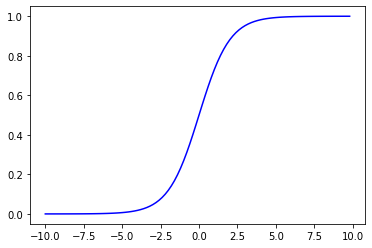

In [16]:
x = np.arange(-10., 10., 0.2)
sig = 1 / (1 + np.exp(-x))
plt.plot(x, sig, 'b', label='Função Sigmoid')

## Começaremos reescrevendo o nosso perceptron

>> O *Perceptron* abaixo, com a função sigmoide de ativação, $y = \frac{1}{1+e^{- \theta}}$, inicia com valores randômicos entre $-1$ e $1$, modelado com o $\theta$ como uma função linear do tipo $\theta = ax + b$, onde $a$ é definido como os pesos (*weights*) e $b$ o viés (*bias*), a variável *update* apresenta o valor calculado em cada iteração (*epoch*) e os pesos e o viés são atualizados através do produto do *gradient descending* e com o erro entre a saída desajada e a calculado .

In [17]:
class Perceptron_sigmoid(object):
  
  def __init__(self, epochs=10):
    np.random.seed(1)
    self.epochs = epochs
    self.weights = None
    self.bias = None
  
  def sigmoid_derivative(self, x):
    #computing derivative to the Sigmoid function
    return x * (1 - x)
  
  def fit (self, X, Y):
    n_samples, n_features = X.shape
    # Inicialize os Pesos e Bias: [ATIVIDADE 11]
    random_values = 2*np.random.random((n_features + 1,)) - 1
    #random_values = np.zeros(1 + n_features)
    self.weights = random_values[1:]
    self.bias = random_values[0]

    for epoch in range(self.epochs):
      for index, x_i in enumerate(X):
        update = self.predict(x_i)
        error = Y[index] - update
        # Calcule o sigmoid_derivative : [ATIVIDADE 12]
        self.weights += self.sigmoid_derivative(update) * x_i * error
        self.bias += self.sigmoid_derivative(update) * error
    return self
      
    
  def predict(self, X):
    # Calcule o output do perceptron: [ATIVIDADE 13]
    theta = np.dot(X, self.weights) + self.bias
    output = self.activation(theta)
    return output
    

  def activation(self, signal):
    return 1 / (1 + np.exp(-signal)) # Função sigmoid de ativação

> Novamente, como na **atividade 5**, é testado a saída, agora com o novo *Perceptron_sigmoid*. 

In [18]:
n_test = 10
n_train = 100
[x_train, x_test, y_train, y_test] = format_y_test(n_train,n_test)
P = Perceptron_sigmoid(epochs= 100)
intermediate = y_train
y_formatado = np.where(intermediate == 1 , 1, 0)
training = P.fit(x_train,y_formatado)
prediction = training.predict(x_test)
print(y_test)
print(np.round(prediction))
print(prediction)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
[5.47216645e-07 1.63405348e-05 9.96830051e-01 3.13944805e-08
 6.91812576e-05 9.99035648e-01 4.41341048e-07 2.74051442e-06
 4.44968399e-03 2.52412460e-06]


>> Como mostra acima, quando ele identifica o valor na base de testes, os valores de predição são sempre próximos a $1$ e são encontrados valores muito baixos para os outros da base de testes, então os valores foram arredondados para a melhor visualização e para poder calcular a acurácia deste caso.

### Atividade 14: Liste, Treine e Rode o sistema
Como feito anteriormente [8, 9, 10] Inicialize seu sistema, treine, e gere seu vetor de predições.

>> Para este *Perceptron*, só é necessário aumentar a base de treinamento em $7 \times$, e usar $\frac{1}{4}$ do valor de iterações para conseguir uma acurácia levemente melhor que o primeiro *Perceptron*.

In [19]:
n_test = 100
n_train = 700
[x_train, x_test, y_train, y_test] = format_y_test(n_train,n_test)

P_list = []
# Liste, Treine e Rode seu sistema de 10 perceptrons: [ATIVIDADE 14]
final_predictions = []

P = Perceptron_sigmoid(epochs= 50)

for i in range(10):
  intermediate = y_train
  y_formatado = np.where(intermediate == i , 1, 0)
  training = P.fit(x_train,y_formatado)
  prediction = training.predict(x_test)
  P_list.append(training)
  # Preencha o vetor final_predictions: [ATIVIDADE 15]
  final_predictions.append(np.round(prediction))

accuracy = new_accuracy(final_predictions, n_test)
print('Acurácia: ',accuracy)



Acurácia:  0.73


# Alguns questionamentos

**1. Compare o desempenho obtido pelo perceptron 1, com função de ativação degrau e do perceptron 2, com função de ativação sigmoid.**

Resposta: O desempenho do segundo *Perceptron* para esta base de dados é muito superior, pois o mesmo com somente $23.3 \%$ da base de treinamento do primeiro *Perceptron* já consegue ter uma acurácia similiar, além do tempo de processamento, o primeiro *perceptron* leva cerca de 2 min, já o segundo 9 s.

**2. Que parâmetros podemos modificar para melhorar a acuracia?**

Resposta: Para o primeiro *perceptron*: a taxa de aprendizado (*alpha*), o número de iterações (*epochs*) e o tamanho da base de treinamento (*n_train*).

Para o segundo *perceptron*: o número de iterações (*epochs*) e o tamanho da base de treinamento (*n_train*).

> Considerando que a base de testes sempre será igual para ambos.